<a href="https://colab.research.google.com/github/Teerapatt6/E-commerce-Price-Analytics/blob/main/notebooks/model/ARIMA-dsde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
!pip install pandas

In [74]:
import pandas as pd

In [100]:
df = pd.read_csv('./s24_price_in_thb.csv', parse_dates=['date'])
df['date'] = pd.to_datetime(df['date'])
df['price_thb'] = pd.to_numeric(df['price_thb'], errors='coerce')

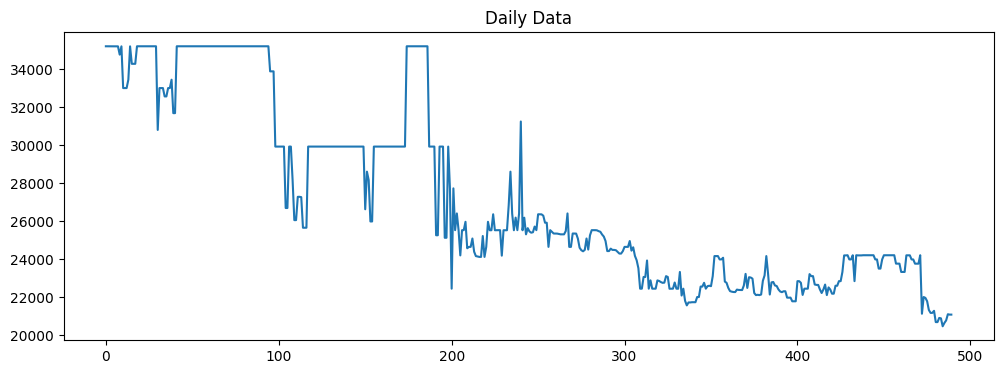

In [93]:
import matplotlib.pyplot as plt
df['price_thb'].plot(figsize=(12,4))
plt.title("Daily Data")
plt.show()

In [94]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['price_thb'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -1.6749894483026628
p-value: 0.44404253762207446


In [95]:
train = df.iloc[:-30]
test = df.iloc[-30:]
train['price_thb'].dtype

dtype('float64')

In [83]:
!pip install statsmodels

In [161]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['price_thb'], order=(3, 2, 0))
fitted = model.fit()

In [162]:
forecast = fitted.forecast(steps=len(test))
forecast

,predicted_mean
460,23634.741180
461,23480.891188
462,23413.090580
463,23335.786195
464,23226.948335
465,23122.203934
466,23033.963840
467,22940.598102
468,22840.808745
469,22743.815001


In [104]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [128]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [163]:
mae = mean_absolute_error(test['price_thb'], forecast)
rmse = np.sqrt(mean_squared_error(test['price_thb'], forecast))
mape = np.mean(np.abs((test['price_thb'] - forecast) / test['price_thb'])) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)

MAE: 686.9188685631121
RMSE: 787.9453739017098
MAPE: 3.0701079411316723


In [145]:
future_forecast = fitted.forecast(steps=30)
print(future_forecast)

460    23634.741180
461    23480.891188
462    23413.090580
463    23335.786195
464    23226.948335
465    23122.203934
466    23033.963840
467    22940.598102
468    22840.808745
469    22743.815001
470    22649.690569
471    22553.805181
472    22456.850313
473    22360.813486
474    22265.184591
475    22169.067859
476    22072.824352
477    21976.821063
478    21880.849862
479    21784.761661
480    21688.672969
481    21592.638750
482    21496.598379
483    21400.533207
484    21304.473926
485    21208.425506
486    21112.373044
487    21016.315984
488    20920.261367
489    20824.208605
Name: predicted_mean, dtype: float64


In [131]:
!pip install matplotlib

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
    package_set, _ = create_package_set_from_installed()
              

In [116]:
import matplotlib.pyplot as plt

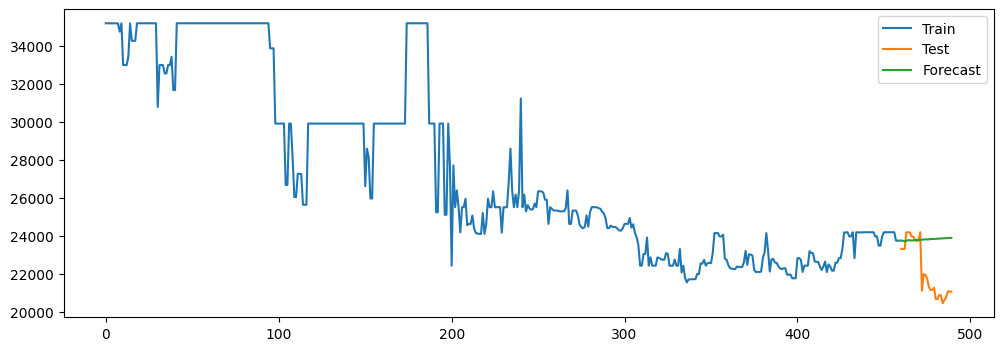

In [159]:
plt.figure(figsize=(12,4))
plt.plot(train.index, train['price_thb'], label='Train')
plt.plot(test.index, test['price_thb'], label='Test')
plt.plot(forecast.index, forecast, label='Forecast')
plt.legend()
plt.show()